# `classification.XGBoostCVClassifier`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import slickml

print(f"Loaded SlickML Version = {slickml.__version__}")

Loaded SlickML Version = 0.2.0b0


In [21]:
from slickml.classification import XGBoostCVClassifier

help(XGBoostCVClassifier)

Help on class XGBoostCVClassifier in module slickml.classification._xgboostcv:

class XGBoostCVClassifier(slickml.classification._xgboost.XGBoostClassifier)
 |  XGBoostCVClassifier(num_boost_round: Optional[int] = 200, sparse_matrix: Optional[bool] = False, scale_mean: Optional[bool] = False, scale_std: Optional[bool] = False, importance_type: Optional[str] = 'total_gain', params: Optional[Dict] = None, n_splits: Optional[int] = 4, metrics: Optional[str] = 'auc', early_stopping_rounds: Optional[int] = 20, random_state: Optional[int] = 1367, stratified: Optional[bool] = True, shuffle: Optional[bool] = True, verbose: Optional[bool] = True, callbacks: Optional[bool] = False) -> None
 |  
 |  XGBoost CV Classifier.
 |  
 |  This is wrapper using ``XGBoostClassifier`` to train a XGBoost [xgboost-api]_ model with using the optimum
 |  number of boosting rounds from the inputs. It used ``xgboost.cv()`` model with n-folds
 |  cross-validation and train model based on the best number of boostin

### Example 1: `XGBoostCVClassifer` model for `breast-cancer` data set

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
    stratify=y,
)

In [5]:
# custom params
params = {
    "eval_metric": "auc",
    "learning_rate": 0.05,
    "max_depth": 2,
    "min_child_weight": 1,
    "gamma": 0.0,
}
clf = XGBoostCVClassifier(
    num_boost_round=333,
    metrics=("logloss"),
    params=params,
)
clf.fit(X_train, y_train)

*-* Best Boosting Round = 230 -*- 4-Folds CV LOGLOSS: Train = 0.017 +/- 0.002 -*- Test = 0.117 +/- 0.047 *-*


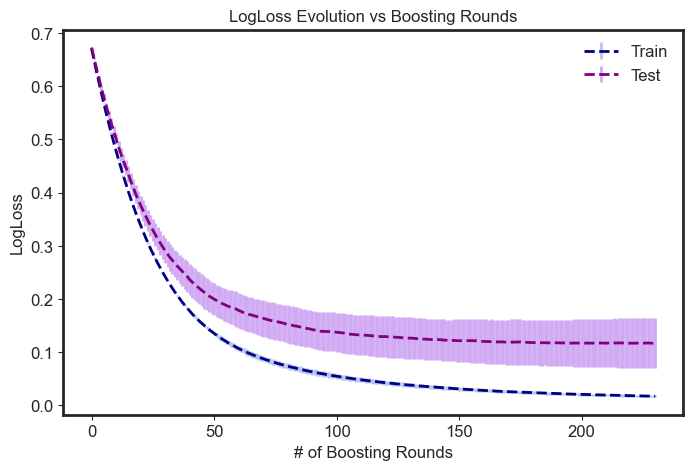

In [6]:
clf.plot_cv_results()

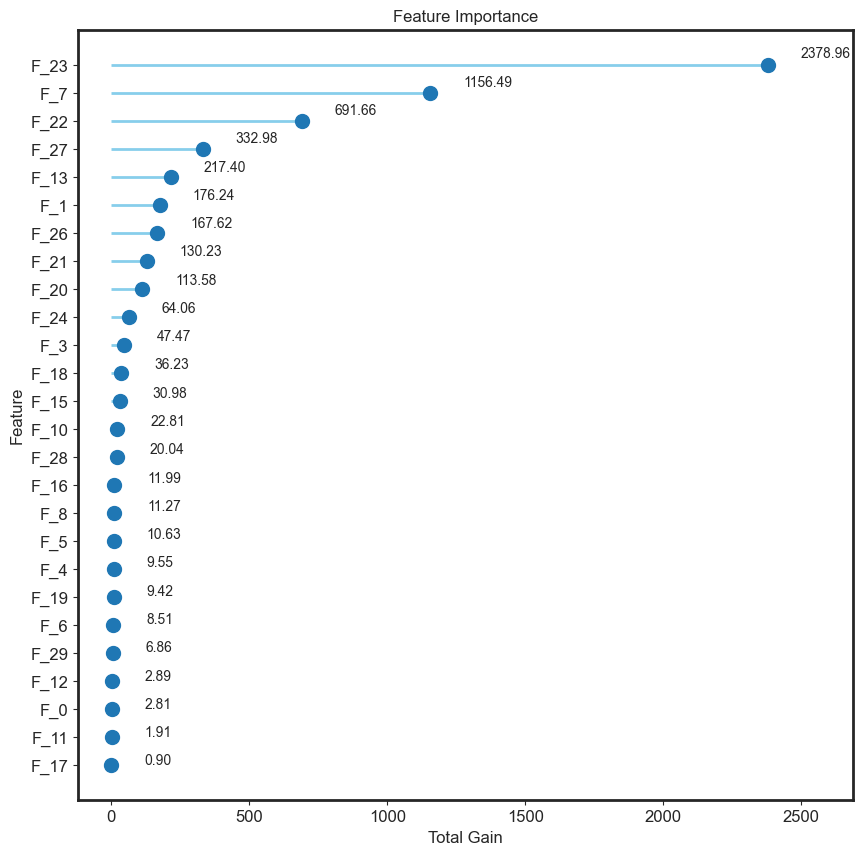

In [7]:
clf.plot_feature_importance(figsize=(10, 10))

In [8]:
# predic proba (or clf.y_pred_proba_)
# please note that y_test is optional
y_pred_proba = clf.predict_proba(X_test, y_test=None)
y_pred_proba[:10]

array([9.1897231e-01, 9.9754119e-01, 9.9752516e-01, 9.7693515e-04,
       9.8618919e-01, 9.9638927e-01, 1.3413267e-03, 4.6024583e-02,
       9.9622983e-01, 8.4459328e-04], dtype=float32)

In [9]:
# pred class (or clf.y_pred_)
# threshold can be set
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [10]:
# pred class (or clf.y_pred_)
# threshold can be set
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0])

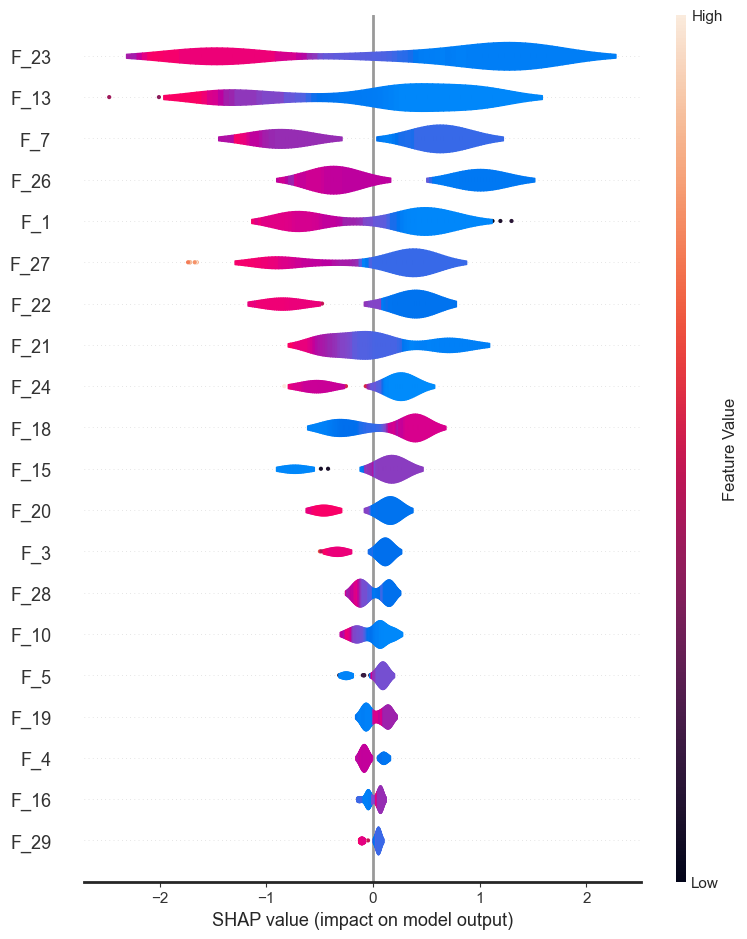

In [11]:
# shap summary plot violin on test data
clf.plot_shap_summary(plot_type="violin", validation=True)

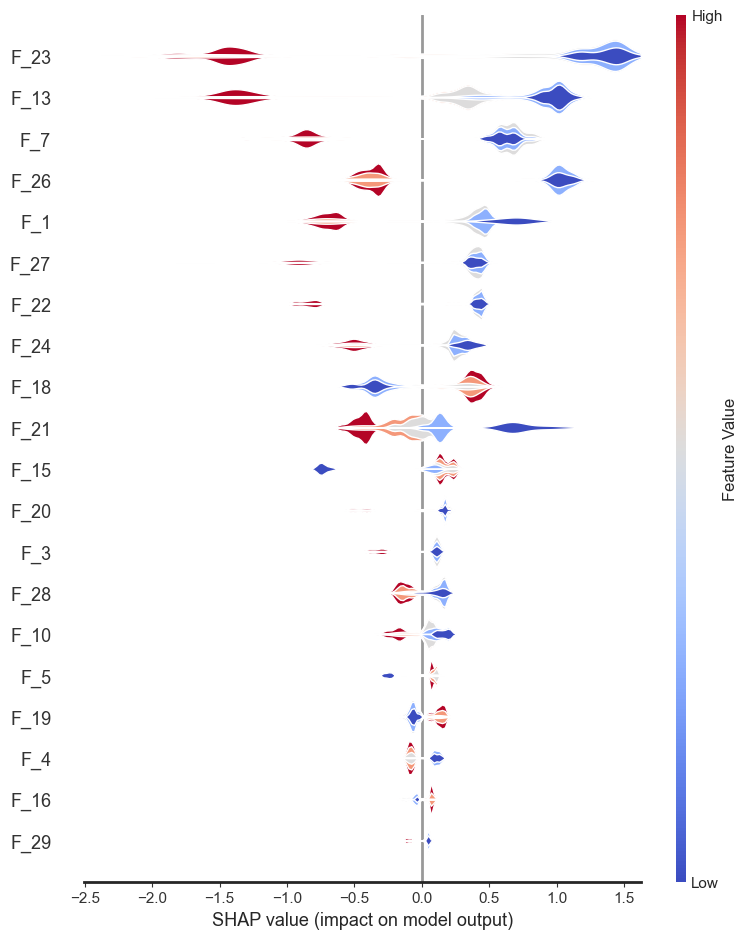

In [12]:
# shap summary plot layered violin plot on train data
clf.plot_shap_summary(
    plot_type="layered_violin",
    validation=False,
    layered_violin_max_num_bins=5,
)

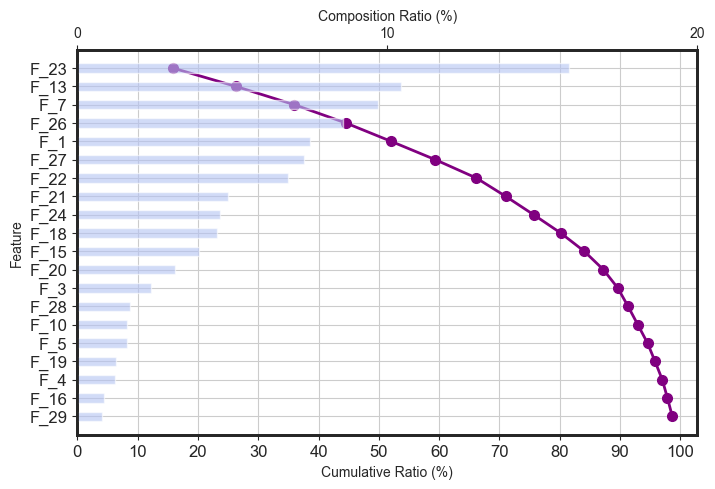

In [13]:
# shap waterfall plot
clf.plot_shap_waterfall()

In [14]:
clf.shap_values_test_[:10]

array([[ 0.01940475, -0.86195767,  0.        ,  0.1294274 , -0.11639754,
         0.08277899, -0.00224171, -0.759166  , -0.01012578,  0.        ,
         0.09667341, -0.02079409,  0.00730259,  0.6742311 ,  0.        ,
         0.2172726 , -0.12817422, -0.01351176,  0.39911455,  0.16328874,
         0.18992378, -0.16463387,  0.42449498,  1.6118883 ,  0.16230232,
         0.        , -0.5007048 ,  0.28385416, -0.1889882 , -0.10697578],
       [ 0.00610301,  0.7219656 ,  0.        ,  0.1010702 ,  0.09555963,
        -0.23107094,  0.01495429,  0.5696618 , -0.01150342,  0.        ,
         0.19280411, -0.02079409,  0.00730259,  1.0701257 ,  0.        ,
        -0.7498647 , -0.04238075,  0.00669298, -0.05357933, -0.04818337,
         0.16882226,  0.10679732,  0.41750938,  1.1342716 ,  0.22258742,
         0.        ,  0.97936475,  0.3375232 ,  0.1253517 ,  0.04431494],
       [ 0.01940475,  0.3623282 ,  0.        ,  0.11418536,  0.07673771,
        -0.27481714,  0.01495429,  0.48159117, -0

In [15]:
clf.shap_values_train_[:10]

array([[-1.76804848e-02,  1.76546916e-01,  0.00000000e+00,
        -2.96206445e-01, -7.15970993e-02,  7.52472430e-02,
        -8.13582726e-03, -8.24036241e-01, -3.04769650e-02,
         0.00000000e+00, -1.30717993e-01, -1.89322792e-02,
        -4.53369040e-03, -1.16452706e+00,  0.00000000e+00,
         2.13733893e-02,  8.00443813e-02, -1.81773435e-02,
        -3.26010823e-01, -6.70453981e-02, -5.28392315e-01,
        -2.03271613e-01, -9.49561357e-01, -1.73079455e+00,
        -4.98613417e-01,  0.00000000e+00, -3.48224461e-01,
        -3.89847666e-01, -8.19063634e-02,  4.13276479e-02],
       [ 6.10300712e-03,  3.74957532e-01,  0.00000000e+00,
         1.21732697e-01,  9.55596343e-02, -2.58139312e-01,
         1.49542894e-02,  6.69741631e-01, -1.15034245e-02,
         0.00000000e+00,  1.92804113e-01,  2.39426494e-02,
         7.30258878e-03,  1.05599737e+00,  0.00000000e+00,
         1.06361337e-01, -5.58919683e-02, -1.63342990e-02,
        -6.16276041e-02,  1.08329013e-01,  1.65577203e-

In [16]:
# cv_results (or clf.cv_results_)
cvr = clf.get_cv_results()
cvr.tail()

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
226,0.017734,0.001800,0.117130,0.047093
227,0.017639,0.001773,0.117320,0.047367
228,0.017549,0.001771,0.117155,0.047354
229,0.017455,0.001765,0.116915,0.047095
230,0.017350,0.001748,0.116734,0.047278


In [17]:
# feature importance (or clf.feature_importance_)
clf.get_feature_importance()

,feature,total_gain
0,F_23,2378.959473
1,F_7,1156.486816
2,F_22,691.664612
3,F_27,332.983337
4,F_13,217.396896
5,F_1,176.241318
6,F_26,167.620331
7,F_21,130.228638
8,F_20,113.581894
9,F_24,64.059128


In [18]:
clf.model_

## You can use the `BinaryClassificationMetrics` class to evaluate your model

In [19]:
from slickml.metrics import BinaryClassificationMetrics

metrics = BinaryClassificationMetrics(y_test, y_pred_proba)

,Accuracy,Balanced Accuracy,ROC AUC,PR AUC,Precision,Recall,Average Precision,F-1 Score,F-2 Score,F-0.50 Score,Threat Score,TP,TN,FP,FN
Threshold = 0.500 | Average = Binary,0.965000,0.959000,0.997000,0.998000,0.963000,0.981000,0.998000,0.972000,0.978000,0.967000,0.946000,105,60,4,2


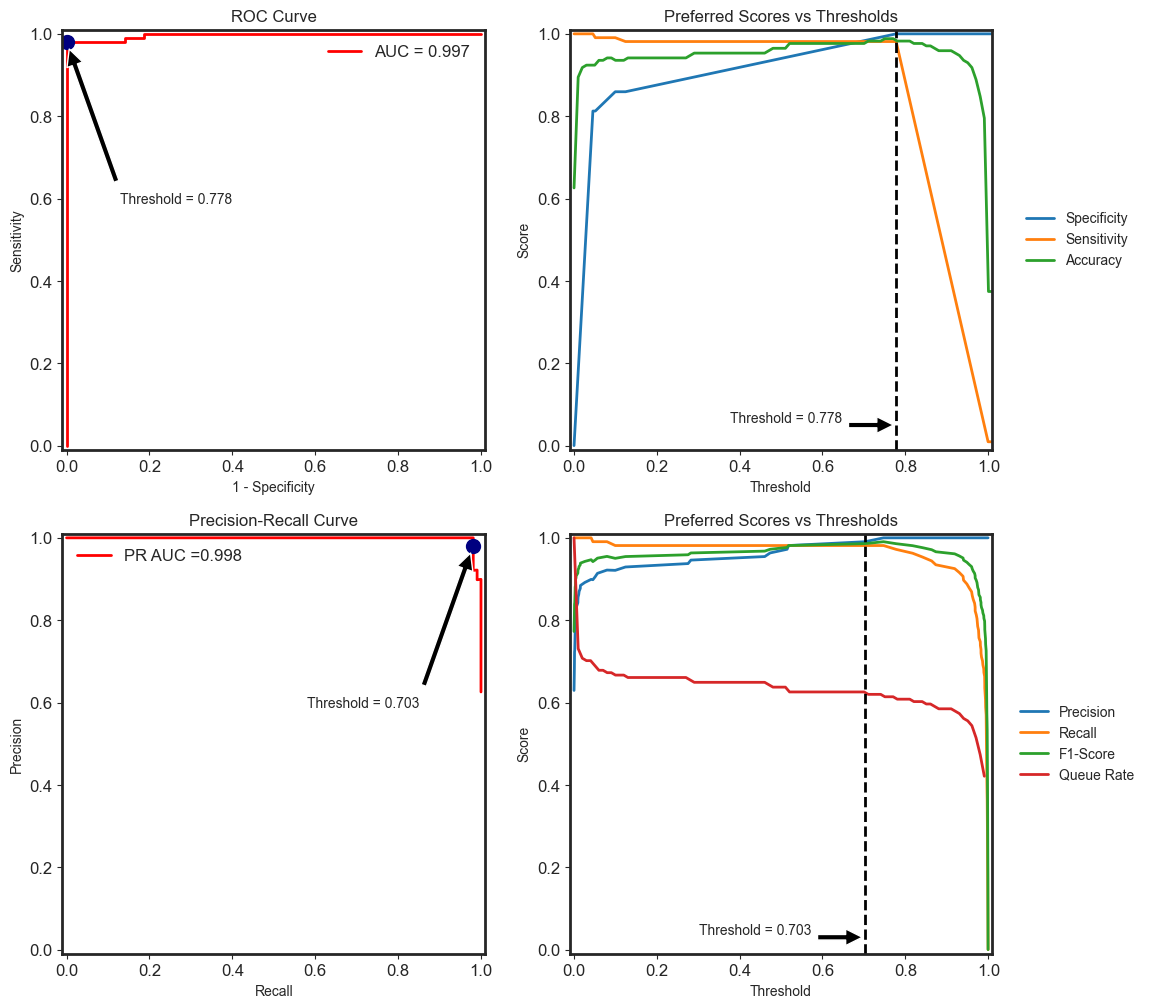

In [20]:
metrics.plot()